
# Basic Data Analysis & Visualization

This notebook demonstrates how to load a sample dataset, perform quick exploratory analysis, group and pivot the data, and create visualizations.

We’re using a CSV file from: https://sample-files.com/downloads/data/csv/basic-data.csv
    


## Install Dependencies

If you haven't installed the required libraries, run:

```bash
pip install pandas matplotlib seaborn
```
    

In [1]:
pip install pandas matplotlib seaborn

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 5.0 MB/s  0:00:02.9 MB/s eta 0:00:01:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 6.5 MB/s  0:00:01m 6.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 6.9 MB/s  0:00:007.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 7.6 MB/s  0:00:007.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 7.9 MB/s  0:00:007.9 MB/s eta 0:00:01
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11/11 [seaborn]━ 10/11 [seaborn]atplotlib]
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

Matplotlib is building the font cache; this may take a moment.


## Load Dataset

In [3]:
# Load the dataset from URL
url = "https://sample-files.com/downloads/data/csv/basic-data.csv"
df = pd.read_csv(url, skiprows=1)
df.columns = df.columns.str.strip()

# Preview the data
df.head()

,ID,Name,Age,Country,Email
0,1,Name_1,62,Country_1,email_1@example.com
1,2,Name_2,48,Country_2,email_2@example.com
2,3,Name_3,61,Country_3,email_3@example.com
3,4,Name_4,32,Country_4,email_4@example.com
4,5,Name_5,69,Country_5,email_5@example.com


## Basic Exploration

In [4]:
# Check shape and summary stats
print(df.shape)
df.describe(include="all")

(100, 5)


,ID,Name,Age,Country,Email
count,100.000000,100,100.000000,100,100
unique,NaN,100,NaN,10,100
top,NaN,Name_1,NaN,Country_1,email_1@example.com
freq,NaN,1,NaN,10,1
mean,50.500000,NaN,44.530000,NaN,NaN
std,29.011492,NaN,15.190012,NaN,NaN
min,1.000000,NaN,18.000000,NaN,NaN
25%,25.750000,NaN,32.000000,NaN,NaN
50%,50.500000,NaN,43.500000,NaN,NaN
75%,75.250000,NaN,59.250000,NaN,NaN


In [5]:
print(df)

     ID      Name  Age    Country                  Email
0     1    Name_1   62  Country_1    email_1@example.com
1     2    Name_2   48  Country_2    email_2@example.com
2     3    Name_3   61  Country_3    email_3@example.com
3     4    Name_4   32  Country_4    email_4@example.com
4     5    Name_5   69  Country_5    email_5@example.com
..  ...       ...  ...        ...                    ...
95   96   Name_96   60  Country_6   email_96@example.com
96   97   Name_97   26  Country_7   email_97@example.com
97   98   Name_98   52  Country_8   email_98@example.com
98   99   Name_99   24  Country_9   email_99@example.com
99  100  Name_100   55  Country_0  email_100@example.com

[100 rows x 5 columns]


## Grouping and Pivoting Data

In [6]:
# Example: Group by 'Country' and count number of records
country_counts = df["Country"].value_counts().reset_index()
country_counts.columns = ["Country", "RecordCount"]
country_counts.head()

,Country,RecordCount
0,Country_1,10
1,Country_2,10
2,Country_3,10
3,Country_4,10
4,Country_5,10


## Visualizing Record Counts by Country

/var/folders/z_/x3_6fwb174s0c7wcsd813s6r0000gn/T/ipykernel_10080/1795714619.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_counts, x="Country", y="RecordCount", palette="viridis")


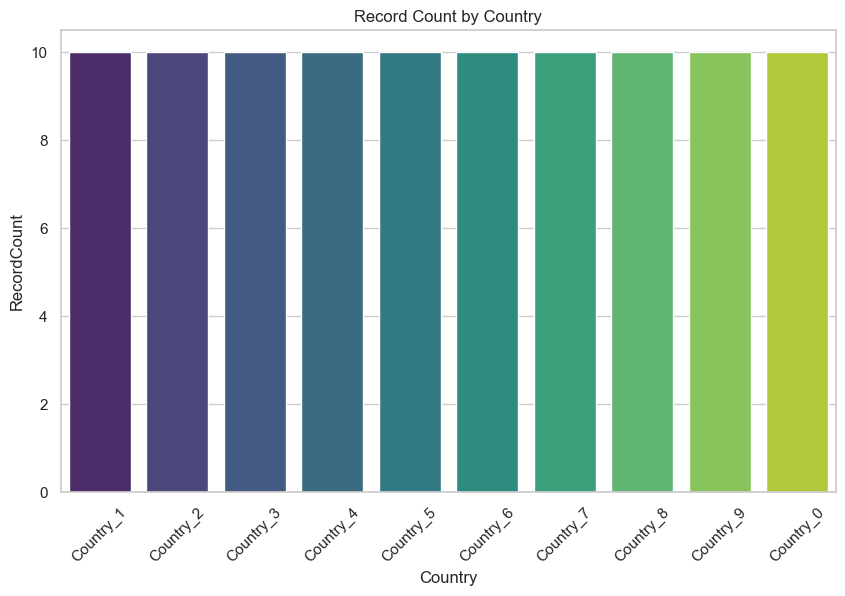

In [7]:
# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=country_counts, x="Country", y="RecordCount", palette="viridis")
plt.title("Record Count by Country")
plt.xticks(rotation=45)
plt.show()

## Pivot Table Example

In [8]:
# If 'Age' exists, average age by country (example only if dataset has relevant column)
if "Age" in df.columns:
    age_pivot = df.pivot_table(index="Country", values="Age", aggfunc="mean")
    display(age_pivot)
else:
    print("No 'Age' column in dataset to pivot on.")

,Age
Country,
Country_0,43.7
Country_1,43.8
Country_2,51.0
Country_3,38.2
Country_4,44.3
Country_5,48.3
Country_6,47.3
Country_7,41.1
Country_8,40.5



## Summary

In this notebook, we:
- Loaded a sample CSV dataset
- Explored its structure
- Grouped and counted records by country
- Visualized results with a bar chart
- Created a pivot table (if applicable)

Try modifying this notebook for your own datasets or audit use cases!
    